In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from eda_utilities import print_eda_stats
from data_pipeline import dockless_data_pipeline
from data_pipeline import weather_data_pipeline

### Read the Dockless Mobility data and run basic null data analysis. 
##### Dockless mobility data is located on the s3 bucket at https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Dockless_Vehicle_Trips.csv
##### Weather data is located on the s3 bucket at https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Bergstom_Airport_Weather.csv

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Dockless_Vehicle_Trips.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dockless_vehicles_columns = df.columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746505 entries, 0 to 2746504
Data columns (total 20 columns):
ID                          object
Device ID                   object
Vehicle Type                object
Trip Duration               float64
Trip Distance               float64
Start Time                  object
End Time                    object
Modified Date               object
Month                       float64
Hour                        float64
Day of Week                 float64
Council District (Start)    float64
Council District (End)      float64
Origin Cell ID              object
Destination Cell ID         object
Year                        float64
Start Latitude              float64
Start Longitude             float64
End Latitude                float64
End Longitude               float64
dtypes: float64(12), object(8)
memory usage: 419.1+ MB


In [5]:
print_eda_stats(df, dockless_vehicles_columns, "Austin Dockless Mobility Data")

+--------------------------+---------+-------------+---------------+--------------+-------------------+
|       Column Name        |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+--------------------------+---------+-------------+---------------+--------------+-------------------+
|            ID            |  object |   2746505   |    2746505    |   2746505    |         0         |
|        Device ID         |  object |   2746505   |     26999     |   2746505    |         0         |
|       Vehicle Type       |  object |   2746504   |       3       |   2746505    |         1         |
|      Trip Duration       | float64 |   2746504   |     10521     |   2746505    |         1         |
|      Trip Distance       | float64 |   2746504   |     16125     |   2746505    |         1         |
|        Start Time        |  object |   2746504   |     25694     |   2746505    |         1         |
|         End Time         |  object |   2746504   |     25768  

In [6]:
#WITH FOUR DECIMAL PLACES (DEFAULT)
df.describe().transpose().to_csv('summary_stats.csv', sep=',')

np.round(df.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
Trip Duration,2746504.0,671.94,7441.55,-86161.00,221.00,388.00,753.00,1.149160e+07
Trip Distance,2746504.0,58032.67,10421635.18,-16724106.00,343.00,887.00,1738.00,2.147484e+09
Month,2746504.0,8.23,3.50,1.00,7.00,9.00,11.00,1.200000e+01
Hour,2746504.0,14.44,4.38,0.00,12.00,15.00,18.00,2.300000e+01
Day of Week,2746504.0,3.17,2.06,0.00,1.00,3.00,5.00,6.000000e+00
Council District (Start),2746474.0,7.73,2.65,0.00,9.00,9.00,9.00,1.000000e+01
Council District (End),2746474.0,7.68,2.67,0.00,9.00,9.00,9.00,1.000000e+01
Year,2746504.0,2018.16,0.37,2018.00,2018.00,2018.00,2018.00,2.019000e+03
Start Latitude,2713821.0,30.19,1.60,0.00,30.26,30.27,30.28,8.229000e+01
Start Longitude,2713821.0,-97.45,5.45,-122.68,-97.75,-97.74,-97.74,1.141300e+02


In [7]:
weather_df = pd.read_csv("https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Bergstom_Airport_Weather.csv")

In [8]:
weather_columns = weather_df.columns
weather_columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'AWND_ATTRIBUTES', 'PGTM', 'PGTM_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES',
       'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG',
       'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES',
       'WDF2', 'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF2',
       'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES',
       'WT02', 'WT02_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
       'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES',
       'WT08', 'WT08_ATTRIBUTES'],
      dtype='object')

In [9]:
print_eda_stats(weather_df, weather_columns, "Austin Weather Data")

+-----------------+---------+-------------+---------------+--------------+-------------------+
|   Column Name   |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+-----------------+---------+-------------+---------------+--------------+-------------------+
|     STATION     |  object |     436     |       1       |     436      |         0         |
|       NAME      |  object |     436     |       1       |     436      |         0         |
|     LATITUDE    | float64 |     436     |       1       |     436      |         0         |
|    LONGITUDE    | float64 |     436     |       1       |     436      |         0         |
|    ELEVATION    | float64 |     436     |       1       |     436      |         0         |
|       DATE      |  object |     436     |      436      |     436      |         0         |
|       AWND      | float64 |     435     |       73      |     436      |         1         |
| AWND_ATTRIBUTES |  object |     435     |       

In [10]:
weather_columns_to_drop = ['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'AWND_ATTRIBUTES', 'PGTM', 'PGTM_ATTRIBUTES', 'PRCP_ATTRIBUTES',
       'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES',
       'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES',
       'WDF2', 'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF2',
       'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES',
       'WT02', 'WT02_ATTRIBUTES', 'WT03', 'WT03_ATTRIBUTES', 'WT04',
       'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES',
       'WT08', 'WT08_ATTRIBUTES']


weather_df.drop(weather_columns_to_drop, axis=1, inplace=True)

In [11]:
weather_df[weather_df['DATE'] == '2019-03-12']

,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
435,2019-03-12,NaN,NaN,NaN,59.0,NaN,NaN


In [12]:
weather_columns = weather_df.columns
# Drop the '2019-03-12' because it was not available 
# weather_df.drop(weather_columns_to_drop, axis=1, inplace=True)
print_eda_stats(weather_df, weather_columns)

+-------------+---------+-------------+---------------+--------------+-------------------+
| Column Name |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+-------------+---------+-------------+---------------+--------------+-------------------+
|     DATE    |  object |     436     |      436      |     436      |         0         |
|     AWND    | float64 |     435     |       73      |     436      |         1         |
|     PRCP    | float64 |     435     |       53      |     436      |         1         |
|     SNOW    | float64 |     435     |       2       |     436      |         1         |
|     TAVG    | float64 |     434     |       63      |     436      |         2         |
|     TMAX    | float64 |     435     |       71      |     436      |         1         |
|     TMIN    | float64 |     435     |       60      |     436      |         1         |
+-------------+---------+-------------+---------------+--------------+-------------------+

#### Initial Analysis of the weather data revealed some null values of the data. The data was not available for the day the data was downloaded and also there was an additional missing values. Both '2019-03-01' and '2019-03-02' had missing TAVG data. From the current analysis I concluded the data was missing at random (MAR) so decided to impede the null values with the data from the previous record.

In [13]:

weather_df[weather_df.isnull().any(axis=1)]


,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
424,2019-03-01,4.92,0.00,0.0,NaN,56.0,43.0
425,2019-03-02,10.74,0.01,0.0,NaN,54.0,46.0
435,2019-03-12,NaN,NaN,NaN,59.0,NaN,NaN


In [14]:
weather_df.fillna(method='ffill', inplace=True)

In [15]:
weather_df[weather_df['DATE'] == '2019-03-11']

,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
434,2019-03-11,11.86,0.0,0.0,63.0,67.0,58.0


In [16]:
df.columns

Index(['ID', 'Device ID', 'Vehicle Type', 'Trip Duration', 'Trip Distance',
       'Start Time', 'End Time', 'Modified Date', 'Month', 'Hour',
       'Day of Week', 'Council District (Start)', 'Council District (End)',
       'Origin Cell ID', 'Destination Cell ID', 'Year', 'Start Latitude',
       'Start Longitude', 'End Latitude', 'End Longitude'],
      dtype='object')

In [31]:
df['Vehicle Type'].unique()

array(['scooter', 'bicycle', nan], dtype=object)

In [17]:
dfnull = df[df.isnull().any(axis=1)]

In [33]:
# mobility_columns_to_drop = ['ID', 'Device ID', 'Vehicle Type', 'Trip Duration', 'Trip Distance',
#        'Start Time', 'End Time', 'Modified Date', 'Month', 'Hour',
#        'Day of Week', 'Council District (Start)', 'Council District (End)',
#        'Origin Cell ID', 'Destination Cell ID', 'Year', 'Start Latitude',
#        'Start Longitude', 'End Latitude', 'End Longitude']

df[df['Vehicle Type'].isnull()]

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude
825895,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,NaN,NaN,NaN,NaN,NaN,12/13/2018 03:36:12 PM,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
dfnull['Vehicle Type'].unique()

array(['scooter', 'bicycle', nan], dtype=object)

In [36]:
dfnull

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude
145,0003ef39-d6c6-42be-b4bd-717d5e213f80,f4cf290d-8ee2-444a-a98e-cc2e8ae0f971,scooter,418.0,900.0,10/21/2018 07:00:00 PM,10/21/2018 07:00:00 PM,12/13/2018 03:41:19 PM,10.0,19.0,0.0,9.0,0.0,014707,OUT_OF_BOUNDS,2018.0,30.268,-97.744,NaN,NaN
267,00080fda-ef07-4c72-81bb-b331ac087a31,ad1e67ea-ae3b-4f55-b158-32d61c9198cd,scooter,63.0,0.0,10/17/2018 05:45:00 PM,10/17/2018 05:45:00 PM,12/13/2018 03:38:06 PM,10.0,17.0,3.0,0.0,9.0,OUT_OF_BOUNDS,014872,2018.0,NaN,NaN,30.286,-97.741
336,000a8aa1-21c7-49f7-93ad-fc8889a05314,09b79c18-52e6-4801-9df7-1936bf5fb25e,scooter,441.0,1886.0,04/17/2018 01:15:00 PM,04/17/2018 01:15:00 PM,12/13/2018 03:42:55 PM,4.0,13.0,2.0,0.0,9.0,015495,014863,2018.0,NaN,NaN,30.265,-97.741
406,000cc84e-90ff-4315-bf45-da33035f28ac,c97c4f15-95a8-40a2-8ac9-814aa4600923,scooter,208.0,500.0,11/25/2018 02:45:00 PM,11/25/2018 02:45:00 PM,12/13/2018 03:42:38 PM,11.0,14.0,0.0,9.0,0.0,014713,OUT_OF_BOUNDS,2018.0,30.282,-97.744,NaN,NaN
414,000d0e79-2763-449c-80cc-9058686ab90e,658f7e34-9e47-4b7e-9bb9-c7239859122f,scooter,414.0,1061.0,04/25/2018 03:30:00 PM,04/25/2018 03:30:00 PM,12/13/2018 07:38:17 AM,4.0,15.0,3.0,9.0,9.0,014705,014391,2018.0,30.263,-97.743,NaN,NaN
453,000e6942-3a96-4384-93af-97ec721c4cc0,8ea6275e-7122-48f2-89c8-b6d93f553204,scooter,408.0,1400.0,11/30/2018 02:00:00 PM,11/30/2018 02:00:00 PM,12/13/2018 03:54:39 PM,11.0,14.0,5.0,0.0,9.0,OUT_OF_BOUNDS,015357,2018.0,NaN,NaN,30.315,-97.734
461,000ea052-ae29-4e6b-891f-bccdc0b8c481,c362be77-8235-400d-a33a-a4cf2c742be6,scooter,313.0,400.0,10/19/2018 05:30:00 PM,10/19/2018 05:30:00 PM,12/13/2018 03:52:56 PM,10.0,17.0,5.0,9.0,0.0,014864,OUT_OF_BOUNDS,2018.0,30.267,-97.741,NaN,NaN
588,00126ad5-74ad-4073-98f3-95bc158de3a4,b6e3766e-2166-4ce6-808e-182846f4523f,scooter,582.0,1000.0,10/10/2018 12:45:00 PM,10/10/2018 01:00:00 PM,12/13/2018 03:39:37 PM,10.0,12.0,3.0,0.0,10.0,OUT_OF_BOUNDS,014882,2018.0,NaN,NaN,30.309,-97.742
616,001313bb-d8a3-4ba7-ba7b-5c79cd2a00d1,add78e92-55ff-421c-a0f0-b2fe66e41f6b,scooter,556.0,580.0,09/30/2018 02:30:00 PM,09/30/2018 02:45:00 PM,12/13/2018 03:52:53 PM,9.0,14.0,0.0,0.0,0.0,OUT_OF_BOUNDS,OUT_OF_BOUNDS,2018.0,NaN,NaN,NaN,NaN
630,001377ba-2c67-4384-8f0b-edfaaeb8e65a,1d816fcf-d573-48cd-ae68-e6cf364e2432,scooter,5287.0,10000.0,10/14/2018 02:45:00 PM,10/14/2018 04:00:00 PM,12/12/2018 09:11:41 PM,10.0,14.0,0.0,0.0,5.0,OUT_OF_BOUNDS,013442,2018.0,NaN,NaN,30.255,-97.762


In [18]:
dfnull.to_csv("Mobility_Data_Null_Values.csv", index=False)

In [42]:
origin_cell_null = dfnull[(dfnull['Origin Cell ID'] == 'OUT_OF_BOUNDS') 
                          | (dfnull['Destination Cell ID'] == 'OUT_OF_BOUNDS')]






In [43]:
origin_cell_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42430 entries, 145 to 2408238
Data columns (total 20 columns):
ID                          42430 non-null object
Device ID                   42430 non-null object
Vehicle Type                42430 non-null object
Trip Duration               42430 non-null float64
Trip Distance               42430 non-null float64
Start Time                  42430 non-null object
End Time                    42430 non-null object
Modified Date               42430 non-null object
Month                       42430 non-null float64
Hour                        42430 non-null float64
Day of Week                 42430 non-null float64
Council District (Start)    42430 non-null float64
Council District (End)      42430 non-null float64
Origin Cell ID              42430 non-null object
Destination Cell ID         42430 non-null object
Year                        42430 non-null float64
Start Latitude              13058 non-null float64
Start Longitude             

In [44]:
dfnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46695 entries, 145 to 2577691
Data columns (total 20 columns):
ID                          46695 non-null object
Device ID                   46695 non-null object
Vehicle Type                46694 non-null object
Trip Duration               46694 non-null float64
Trip Distance               46694 non-null float64
Start Time                  46694 non-null object
End Time                    46694 non-null object
Modified Date               46695 non-null object
Month                       46694 non-null float64
Hour                        46694 non-null float64
Day of Week                 46694 non-null float64
Council District (Start)    46664 non-null float64
Council District (End)      46664 non-null float64
Origin Cell ID              44607 non-null object
Destination Cell ID         44607 non-null object
Year                        46694 non-null float64
Start Latitude              14011 non-null float64
Start Longitude             

In [45]:
dfnull.shape

(46695, 20)

In [46]:
origin_cell_null.shape

(42430, 20)

In [47]:
df.shape

(2746505, 20)

#### Initial Analysis of the Scooter Data revealed that are 46695 rows are null out of 2746505 rows. Out of them 2088 of them have either Origin Cell ID or Destination Cell ID has 'OUT_OF_BOUNDS' value. I will be follow up with City of Austin transportation department regarding null values. For the first pass I will be deleting all the rows which have 'OUT_OF_BOUNDS' in the Origin or Destination Cell ID as it is required for the data analysis.

In [49]:
df.drop(df.index[(df['Origin Cell ID'] == 'OUT_OF_BOUNDS') 
                          | (df['Destination Cell ID'] == 'OUT_OF_BOUNDS')], inplace = True)

In [50]:
df.shape

(2695253, 20)

#### Since data of interest currently is only scooter data I have decided all the data that is not of type scooter. 'Vehicle Type' != 'scooter'

In [52]:
df[df['Vehicle Type'] != 'scooter']


df.drop(df.index[(df['Vehicle Type'] != 'scooter')], inplace = True)

In [53]:
df.shape

(2619407, 20)

#### Data size changed from 2746505 - > 2695253 (After removing the Cell ID's = 'OUT_OF_BOUNDS') -> 2619407 (After removing the Vehicle Type != 'scooter'

In [54]:
print_eda_stats(df, dockless_vehicles_columns)

+--------------------------+---------+-------------+---------------+--------------+-------------------+
|       Column Name        |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+--------------------------+---------+-------------+---------------+--------------+-------------------+
|            ID            |  object |   2619407   |    2619407    |   2619407    |         0         |
|        Device ID         |  object |   2619407   |     26124     |   2619407    |         0         |
|       Vehicle Type       |  object |   2619407   |       1       |   2619407    |         0         |
|      Trip Duration       | float64 |   2619407   |      9799     |   2619407    |         0         |
|      Trip Distance       | float64 |   2619407   |     15464     |   2619407    |         0         |
|        Start Time        |  object |   2619407   |     25513     |   2619407    |         0         |
|         End Time         |  object |   2619407   |     25599  

In [56]:
df[(df['Origin Cell ID'].isnull()) | (df['Destination Cell ID'].isnull())]

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude
746,0017b1f5-a65e-44b3-8635-288280b20705,d7f1ccf7-ac15-4c08-bf95-acfe10769f01,scooter,340.0,1291.0,06/26/2018 08:45:00 AM,06/26/2018 08:45:00 AM,12/13/2018 03:57:04 PM,6.0,8.0,2.0,0.0,0.0,NaN,NaN,2018.0,NaN,NaN,NaN,NaN
1072,00218c29-47e8-4e80-9fcd-c2c1c60a1540,02e3ac3b-5db7-437c-a559-b8ff40889c83,scooter,161.0,0.0,04/19/2018 05:30:00 PM,04/19/2018 05:30:00 PM,12/13/2018 03:52:47 PM,4.0,17.0,4.0,0.0,0.0,NaN,NaN,2018.0,NaN,NaN,NaN,NaN
1599,003362d8-d42a-42fd-930d-526260013d7e,d7f1ccf7-ac15-4c08-bf95-acfe10769f01,scooter,176.0,411.0,05/24/2018 11:30:00 AM,05/24/2018 11:30:00 AM,12/13/2018 03:55:06 PM,5.0,11.0,4.0,0.0,0.0,NaN,NaN,2018.0,NaN,NaN,NaN,NaN
2357,004c5f0b-9217-4071-a9f8-f4d5349456c0,aaefed18-0043-4b52-ac8c-d64b6431f94a,scooter,2723.0,6595.0,04/18/2018 04:15:00 PM,04/18/2018 05:00:00 PM,12/13/2018 03:48:44 PM,4.0,16.0,3.0,0.0,0.0,NaN,NaN,2018.0,NaN,NaN,NaN,NaN
2976,006111e9-bec3-42de-9a58-6543083d4bee,7d268ff8-01c3-4d35-8312-a700703f34d8,scooter,192.0,387.0,04/26/2018 01:30:00 PM,04/26/2018 01:30:00 PM,12/13/2018 03:43:34 PM,4.0,13.0,4.0,0.0,0.0,NaN,NaN,2018.0,NaN,NaN,NaN,NaN
4285,008c697b-e6a8-45bb-8592-0215f8def5d2,6097686d-9fed-46e1-a90b-1e8857c8485b,scooter,122.0,0.0,06/04/2018 10:45:00 AM,06/04/2018 10:45:00 AM,12/13/2018 03:43:34 PM,6.0,10.0,1.0,7.0,7.0,NaN,NaN,2018.0,30.388,-97.689,30.388,-97.689
5320,00ac9773-1e7e-4073-a018-975123f23a4f,e185d474-7c4a-4c08-b9e1-d4cf53ca10e4,scooter,145.0,547.0,04/26/2018 12:15:00 PM,04/26/2018 12:15:00 PM,12/13/2018 03:43:34 PM,4.0,12.0,4.0,0.0,0.0,NaN,NaN,2018.0,NaN,NaN,NaN,NaN
5596,00b5b66f-7c60-46a4-ac0b-ec7dc6f098a7,be130773-572d-4f42-8f0e-b120982dc709,scooter,2942.0,7636.0,06/10/2018 10:45:00 AM,06/10/2018 11:30:00 AM,12/13/2018 03:49:28 PM,6.0,10.0,0.0,0.0,0.0,NaN,NaN,2018.0,NaN,NaN,NaN,NaN
6014,00c3bdb5-0463-4d71-aa68-bdab86a675db,eb8328d4-6b95-4d49-982b-95fbc18ff0bf,scooter,1763.0,5995.0,04/20/2018 11:15:00 AM,04/20/2018 11:45:00 AM,12/13/2018 03:45:16 PM,4.0,11.0,5.0,0.0,0.0,NaN,NaN,2018.0,NaN,NaN,NaN,NaN
6833,00df0264-a5b6-4e06-b2c3-3b93f3123b52,73c52998-a325-480a-b96a-5c2a3a41e02a,scooter,900.0,1993.0,06/18/2018 03:45:00 PM,06/18/2018 04:00:00 PM,12/13/2018 03:43:44 PM,6.0,15.0,1.0,0.0,0.0,NaN,NaN,2018.0,NaN,NaN,NaN,NaN


In [57]:

df.drop(df.index[(df['Origin Cell ID'].isnull()) | (df['Destination Cell ID'].isnull())], inplace = True)

In [58]:
df.shape

(2617320, 20)

In [59]:
print_eda_stats(df, dockless_vehicles_columns)

+--------------------------+---------+-------------+---------------+--------------+-------------------+
|       Column Name        |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+--------------------------+---------+-------------+---------------+--------------+-------------------+
|            ID            |  object |   2617320   |    2617320    |   2617320    |         0         |
|        Device ID         |  object |   2617320   |     26096     |   2617320    |         0         |
|       Vehicle Type       |  object |   2617320   |       1       |   2617320    |         0         |
|      Trip Duration       | float64 |   2617320   |      9794     |   2617320    |         0         |
|      Trip Distance       | float64 |   2617320   |     15455     |   2617320    |         0         |
|        Start Time        |  object |   2617320   |     25506     |   2617320    |         0         |
|         End Time         |  object |   2617320   |     25590  

#### Data size changed from 2746505 - > 2695253 (After removing the Cell ID's = 'OUT_OF_BOUNDS') -> 2619407 (After removing the Vehicle Type != 'scooter' - > 2617320 (After removing the Cell ID's null). After all the cleaning there are still 1329 rows with Start Latitude, Longitude to be null and 1158 rows with End Latitude and Longitude to be null

In [60]:
df.drop(df.index[(df['Start Latitude'].isnull()) | (df['End Latitude'].isnull())], inplace = True)

In [61]:
df.shape

(2615143, 20)

In [62]:
print_eda_stats(df, dockless_vehicles_columns)

+--------------------------+---------+-------------+---------------+--------------+-------------------+
|       Column Name        |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+--------------------------+---------+-------------+---------------+--------------+-------------------+
|            ID            |  object |   2615143   |    2615143    |   2615143    |         0         |
|        Device ID         |  object |   2615143   |     26094     |   2615143    |         0         |
|       Vehicle Type       |  object |   2615143   |       1       |   2615143    |         0         |
|      Trip Duration       | float64 |   2615143   |      9773     |   2615143    |         0         |
|      Trip Distance       | float64 |   2615143   |     15441     |   2615143    |         0         |
|        Start Time        |  object |   2615143   |     25504     |   2615143    |         0         |
|         End Time         |  object |   2615143   |     25588  

In [63]:
df.columns

Index(['ID', 'Device ID', 'Vehicle Type', 'Trip Duration', 'Trip Distance',
       'Start Time', 'End Time', 'Modified Date', 'Month', 'Hour',
       'Day of Week', 'Council District (Start)', 'Council District (End)',
       'Origin Cell ID', 'Destination Cell ID', 'Year', 'Start Latitude',
       'Start Longitude', 'End Latitude', 'End Longitude'],
      dtype='object')

In [64]:
mobility_columns_to_drop = ['ID', 'Device ID', 'Vehicle Type', 'Modified Date']

In [65]:
df.drop(mobility_columns_to_drop, axis=1, inplace=True)

In [66]:
df.head(5)

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude
0,358.0,915.0,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,6.0,17.0,5.0,5.0,9.0,013445,013916,2018.0,30.263,-97.762,30.259,-97.754
1,226.0,839.0,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,11.0,11.0,5.0,9.0,9.0,014556,015186,2018.0,30.283,-97.745,30.284,-97.737
2,324.0,1206.0,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,10.0,15.0,2.0,9.0,9.0,015344,015032,2018.0,30.285,-97.734,30.291,-97.738
3,1096.0,0.0,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,9.0,16.0,0.0,9.0,9.0,014707,014081,2018.0,30.268,-97.743,30.276,-97.752
4,408.0,1144.0,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,9.0,11.0,5.0,3.0,3.0,016114,015642,2018.0,30.242,-97.721,30.244,-97.729


In [67]:
weather_df.head(5)

,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,2018-01-01,16.78,0.0,0.0,28.0,32.0,24.0
1,2018-01-02,10.74,0.0,0.0,29.0,32.0,23.0
2,2018-01-03,3.13,0.0,0.0,31.0,56.0,15.0
3,2018-01-04,2.68,0.0,0.0,36.0,54.0,22.0
4,2018-01-05,4.47,0.0,0.0,49.0,61.0,35.0


In [69]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 7 columns):
DATE    436 non-null object
AWND    436 non-null float64
PRCP    436 non-null float64
SNOW    436 non-null float64
TAVG    436 non-null float64
TMAX    436 non-null float64
TMIN    436 non-null float64
dtypes: float64(6), object(1)
memory usage: 23.9+ KB


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615143 entries, 0 to 2746504
Data columns (total 16 columns):
Trip Duration               float64
Trip Distance               float64
Start Time                  object
End Time                    object
Month                       float64
Hour                        float64
Day of Week                 float64
Council District (Start)    float64
Council District (End)      float64
Origin Cell ID              object
Destination Cell ID         object
Year                        float64
Start Latitude              float64
Start Longitude             float64
End Latitude                float64
End Longitude               float64
dtypes: float64(12), object(4)
memory usage: 339.2+ MB


In [71]:
weather_df.rename(columns={'AWND': 'AVG_DAILY_WIND_SPEED', 'PRCP': 'PRECIPITATION','TAVG': 'AVG_TEMPERATURE', 'TMAX': 'MAX_TEMPERATURE','TMIN': 'MIN_TEMPERATURE' }, inplace=True)

In [75]:
weather_df.info()

weather_df_1 = weather_df
weather_df_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 7 columns):
DATE                    436 non-null object
AVG_DAILY_WIND_SPEED    436 non-null float64
PRECIPITATION           436 non-null float64
SNOW                    436 non-null float64
AVG_TEMPERATURE         436 non-null float64
MAX_TEMPERATURE         436 non-null float64
MIN_TEMPERATURE         436 non-null float64
dtypes: float64(6), object(1)
memory usage: 23.9+ KB


,DATE,AVG_DAILY_WIND_SPEED,PRECIPITATION,SNOW,AVG_TEMPERATURE,MAX_TEMPERATURE,MIN_TEMPERATURE
0,2018-01-01,16.78,0.00,0.0,28.0,32.0,24.0
1,2018-01-02,10.74,0.00,0.0,29.0,32.0,23.0
2,2018-01-03,3.13,0.00,0.0,31.0,56.0,15.0
3,2018-01-04,2.68,0.00,0.0,36.0,54.0,22.0
4,2018-01-05,4.47,0.00,0.0,49.0,61.0,35.0
5,2018-01-06,4.47,0.00,0.0,45.0,64.0,29.0
6,2018-01-07,10.29,0.00,0.0,59.0,70.0,53.0
7,2018-01-08,11.18,0.00,0.0,60.0,69.0,36.0
8,2018-01-09,2.91,0.00,0.0,48.0,70.0,31.0
9,2018-01-10,9.40,0.00,0.0,53.0,72.0,40.0


In [77]:
# Convert the date in weather dataframe to datetime object

weather_df_1['DATE'] = weather_df_1['DATE'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [78]:
weather_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 7 columns):
DATE                    436 non-null datetime64[ns]
AVG_DAILY_WIND_SPEED    436 non-null float64
PRECIPITATION           436 non-null float64
SNOW                    436 non-null float64
AVG_TEMPERATURE         436 non-null float64
MAX_TEMPERATURE         436 non-null float64
MIN_TEMPERATURE         436 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 23.9 KB


In [79]:
weather_df_1.head(5)

,DATE,AVG_DAILY_WIND_SPEED,PRECIPITATION,SNOW,AVG_TEMPERATURE,MAX_TEMPERATURE,MIN_TEMPERATURE
0,2018-01-01,16.78,0.0,0.0,28.0,32.0,24.0
1,2018-01-02,10.74,0.0,0.0,29.0,32.0,23.0
2,2018-01-03,3.13,0.0,0.0,31.0,56.0,15.0
3,2018-01-04,2.68,0.0,0.0,36.0,54.0,22.0
4,2018-01-05,4.47,0.0,0.0,49.0,61.0,35.0


#### Weather Data Details. Precipitation - Units of Measure -  inches, Snow - Units of Measure - inches, Avg_Daily_Wind_Speed - Units of Measure - MPH, AVG_TEMPERATURE, MAX_TEMPERATURE, MIN_TEMPERATURE- Units of Measure - Degrees Fahrenheit

In [88]:
df_1 = df

In [84]:
df_1.head(5)

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude
0,358.0,915.0,06/29/2018 05:30:00 PM,06/29/2018 05:30:00 PM,6.0,17.0,5.0,5.0,9.0,013445,013916,2018.0,30.263,-97.762,30.259,-97.754
1,226.0,839.0,11/30/2018 11:00:00 AM,11/30/2018 11:00:00 AM,11.0,11.0,5.0,9.0,9.0,014556,015186,2018.0,30.283,-97.745,30.284,-97.737
2,324.0,1206.0,10/02/2018 03:15:00 PM,10/02/2018 03:30:00 PM,10.0,15.0,2.0,9.0,9.0,015344,015032,2018.0,30.285,-97.734,30.291,-97.738
3,1096.0,0.0,09/02/2018 04:45:00 PM,09/02/2018 05:00:00 PM,9.0,16.0,0.0,9.0,9.0,014707,014081,2018.0,30.268,-97.743,30.276,-97.752
4,408.0,1144.0,09/28/2018 11:45:00 AM,09/28/2018 11:45:00 AM,9.0,11.0,5.0,3.0,3.0,016114,015642,2018.0,30.242,-97.721,30.244,-97.729


In [89]:
df_1['Start Time'] = df_1['Start Time'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
df_1['End Time'] = df_1['End Time'].apply(lambda x: dt.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))

In [90]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615143 entries, 0 to 2746504
Data columns (total 18 columns):
Trip Duration               float64
Trip Distance               float64
Start Time                  datetime64[ns]
End Time                    datetime64[ns]
Month                       float64
Hour                        float64
Day of Week                 float64
Council District (Start)    float64
Council District (End)      float64
Origin Cell ID              object
Destination Cell ID         object
Year                        float64
Start Latitude              float64
Start Longitude             float64
End Latitude                float64
End Longitude               float64
START_DATE                  datetime64[ns]
END_DATE                    datetime64[ns]
dtypes: datetime64[ns](4), float64(12), object(2)
memory usage: 379.1+ MB


In [91]:
# df['just_date'] = df['dates'].dt.date
df_1.head(5)

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE
0,358.0,915.0,2018-06-29 17:30:00,2018-06-29 17:30:00,6.0,17.0,5.0,5.0,9.0,013445,013916,2018.0,30.263,-97.762,30.259,-97.754,2018-06-29 17:30:00,2018-06-29 17:30:00
1,226.0,839.0,2018-11-30 11:00:00,2018-11-30 11:00:00,11.0,11.0,5.0,9.0,9.0,014556,015186,2018.0,30.283,-97.745,30.284,-97.737,2018-11-30 11:00:00,2018-11-30 11:00:00
2,324.0,1206.0,2018-10-02 15:15:00,2018-10-02 15:30:00,10.0,15.0,2.0,9.0,9.0,015344,015032,2018.0,30.285,-97.734,30.291,-97.738,2018-10-02 15:15:00,2018-10-02 15:30:00
3,1096.0,0.0,2018-09-02 16:45:00,2018-09-02 17:00:00,9.0,16.0,0.0,9.0,9.0,014707,014081,2018.0,30.268,-97.743,30.276,-97.752,2018-09-02 16:45:00,2018-09-02 17:00:00
4,408.0,1144.0,2018-09-28 11:45:00,2018-09-28 11:45:00,9.0,11.0,5.0,3.0,3.0,016114,015642,2018.0,30.242,-97.721,30.244,-97.729,2018-09-28 11:45:00,2018-09-28 11:45:00


In [98]:
df_1['START_DATE'] = df_1['Start Time'].dt.date
df_1['END_DATE'] = df_1['End Time'].dt.date

In [99]:
df_1.head(5)

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE
0,358.0,915.0,2018-06-29 17:30:00,2018-06-29 17:30:00,6.0,17.0,5.0,5.0,9.0,013445,013916,2018.0,30.263,-97.762,30.259,-97.754,2018-06-29,2018-06-29
1,226.0,839.0,2018-11-30 11:00:00,2018-11-30 11:00:00,11.0,11.0,5.0,9.0,9.0,014556,015186,2018.0,30.283,-97.745,30.284,-97.737,2018-11-30,2018-11-30
2,324.0,1206.0,2018-10-02 15:15:00,2018-10-02 15:30:00,10.0,15.0,2.0,9.0,9.0,015344,015032,2018.0,30.285,-97.734,30.291,-97.738,2018-10-02,2018-10-02
3,1096.0,0.0,2018-09-02 16:45:00,2018-09-02 17:00:00,9.0,16.0,0.0,9.0,9.0,014707,014081,2018.0,30.268,-97.743,30.276,-97.752,2018-09-02,2018-09-02
4,408.0,1144.0,2018-09-28 11:45:00,2018-09-28 11:45:00,9.0,11.0,5.0,3.0,3.0,016114,015642,2018.0,30.242,-97.721,30.244,-97.729,2018-09-28,2018-09-28


In [103]:
df_1.Month.unique()

array([ 6, 11, 10,  9,  7,  4, 12,  8,  5,  1,  2])

In [101]:
# Convert the month, hour, Day of Week, Council District(Start, End), Year to integers instead of floats
int_columns = ['Month', 'Hour', 'Day of Week', 'Council District (Start)', 'Council District (End)', 'Year']
df_1[int_columns] = df_1[int_columns].astype(int)

In [3]:
# Load the data and and call the clean method automatically to call the work flow
df2 = pd.read_csv("https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Dockless_Vehicle_Trips.csv")
dockless_vehicles_columns = df2.columns

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print_eda_stats(df2, dockless_vehicles_columns, "Austin Dockless Mobility Data")

+--------------------------+---------+-------------+---------------+--------------+-------------------+
|       Column Name        |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+--------------------------+---------+-------------+---------------+--------------+-------------------+
|            ID            |  object |   2746505   |    2746505    |   2746505    |         0         |
|        Device ID         |  object |   2746505   |     26999     |   2746505    |         0         |
|       Vehicle Type       |  object |   2746504   |       3       |   2746505    |         1         |
|      Trip Duration       | float64 |   2746504   |     10521     |   2746505    |         1         |
|      Trip Distance       | float64 |   2746504   |     16125     |   2746505    |         1         |
|        Start Time        |  object |   2746504   |     25694     |   2746505    |         1         |
|         End Time         |  object |   2746504   |     25768  

In [6]:
dockless_data_pipeline(df2)

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE
0,358.0,915.0,2018-06-29 17:30:00,2018-06-29 17:30:00,6,17,5,5,9,013445,013916,2018,30.263,-97.762,30.259,-97.754,2018-06-29,2018-06-29
1,226.0,839.0,2018-11-30 11:00:00,2018-11-30 11:00:00,11,11,5,9,9,014556,015186,2018,30.283,-97.745,30.284,-97.737,2018-11-30,2018-11-30
2,324.0,1206.0,2018-10-02 15:15:00,2018-10-02 15:30:00,10,15,2,9,9,015344,015032,2018,30.285,-97.734,30.291,-97.738,2018-10-02,2018-10-02
3,1096.0,0.0,2018-09-02 16:45:00,2018-09-02 17:00:00,9,16,0,9,9,014707,014081,2018,30.268,-97.743,30.276,-97.752,2018-09-02,2018-09-02
4,408.0,1144.0,2018-09-28 11:45:00,2018-09-28 11:45:00,9,11,5,3,3,016114,015642,2018,30.242,-97.721,30.244,-97.729,2018-09-28,2018-09-28
5,1094.0,2631.0,2018-07-22 16:30:00,2018-07-22 16:45:00,7,16,0,9,5,014546,013602,2018,30.260,-97.746,30.262,-97.761,2018-07-22,2018-07-22
6,705.0,1248.0,2018-10-28 09:30:00,2018-10-28 09:45:00,10,9,0,1,9,014867,014870,2018,30.274,-97.740,30.281,-97.741,2018-10-28,2018-10-28
7,143.0,702.0,2018-10-08 17:45:00,2018-10-08 17:45:00,10,17,1,9,9,014401,014560,2018,30.289,-97.747,30.293,-97.745,2018-10-08,2018-10-08
8,215.0,180.0,2018-06-16 22:00:00,2018-06-16 22:00:00,6,22,6,9,9,014707,014707,2018,30.268,-97.744,30.267,-97.744,2018-06-16,2018-06-16
9,197.0,530.0,2018-10-25 10:45:00,2018-10-25 11:00:00,10,10,4,9,9,014548,014234,2018,30.265,-97.746,30.267,-97.752,2018-10-25,2018-10-25


In [7]:
dockless_vehicles_columns = df2.columns
print_eda_stats(df2, dockless_vehicles_columns, "Austin Dockless Mobility Data")

+--------------------------+----------------+-------------+---------------+--------------+-------------------+
|       Column Name        |     dtype      | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+--------------------------+----------------+-------------+---------------+--------------+-------------------+
|      Trip Duration       |    float64     |   2615143   |      9773     |   2615143    |         0         |
|      Trip Distance       |    float64     |   2615143   |     15441     |   2615143    |         0         |
|        Start Time        | datetime64[ns] |   2615143   |     25504     |   2615143    |         0         |
|         End Time         | datetime64[ns] |   2615143   |     25588     |   2615143    |         0         |
|          Month           |     int64      |   2615143   |       11      |   2615143    |         0         |
|           Hour           |     int64      |   2615143   |       24      |   2615143    |         0         |
|

In [11]:
df2.head(5)

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE
0,358.0,915.0,2018-06-29 17:30:00,2018-06-29 17:30:00,6,17,5,5,9,013445,013916,2018,30.263,-97.762,30.259,-97.754,2018-06-29,2018-06-29
1,226.0,839.0,2018-11-30 11:00:00,2018-11-30 11:00:00,11,11,5,9,9,014556,015186,2018,30.283,-97.745,30.284,-97.737,2018-11-30,2018-11-30
2,324.0,1206.0,2018-10-02 15:15:00,2018-10-02 15:30:00,10,15,2,9,9,015344,015032,2018,30.285,-97.734,30.291,-97.738,2018-10-02,2018-10-02
3,1096.0,0.0,2018-09-02 16:45:00,2018-09-02 17:00:00,9,16,0,9,9,014707,014081,2018,30.268,-97.743,30.276,-97.752,2018-09-02,2018-09-02
4,408.0,1144.0,2018-09-28 11:45:00,2018-09-28 11:45:00,9,11,5,3,3,016114,015642,2018,30.242,-97.721,30.244,-97.729,2018-09-28,2018-09-28


In [12]:
dockless_data = df2

In [8]:
weather_data = pd.read_csv("https://s3.amazonaws.com/sameera-bucket-1/dockless_mobility/raw_data/Austin_Bergstom_Airport_Weather.csv")
weather_columns = weather_data.columns
print_eda_stats(weather_data, weather_columns, "Austin Weather Data")
weather_data_pipeline(weather_data)
weather_columns = weather_data.columns
print_eda_stats(weather_data, weather_columns, "Austin Weather Data")

+-----------------+---------+-------------+---------------+--------------+-------------------+
|   Column Name   |  dtype  | Total_Count | Unique_Values | df_totalrows | Null Value counts |
+-----------------+---------+-------------+---------------+--------------+-------------------+
|     STATION     |  object |     436     |       1       |     436      |         0         |
|       NAME      |  object |     436     |       1       |     436      |         0         |
|     LATITUDE    | float64 |     436     |       1       |     436      |         0         |
|    LONGITUDE    | float64 |     436     |       1       |     436      |         0         |
|    ELEVATION    | float64 |     436     |       1       |     436      |         0         |
|       DATE      |  object |     436     |      436      |     436      |         0         |
|       AWND      | float64 |     435     |       73      |     436      |         1         |
| AWND_ATTRIBUTES |  object |     435     |       

####  Trip duration - UOM in seconds, Trip distance - UOM in meters, Month - where 1 = January, etc.,  Hour - The hour of the day during which trip occurred, in local time (US/Central),  Day of Week - where Sunday = 0, and so on, 

In [16]:
minimum_trip_distance = dockless_data['Trip Distance'].min() # minimum trip distance
maximum_trip_distance = dockless_data['Trip Distance'].max() # maximum trip distance
print("Minimum Trip Distance %s in meters" % minimum_trip_distance)
print("Maximum Trip Distance %s in meters" % maximum_trip_distance)
print("Uniques Trip Distance values %s" %len(dockless_data['Trip Distance'].unique()))

Minimum Trip Distance -16724106.0 in meters
Maximum Trip Distance 2147479547.0 in meters
Uniques Trip Distance values 15441


In [17]:
minimum_trip_duration = dockless_data['Trip Duration'].min() # minimum trip distance
maximum_trip_duration = dockless_data['Trip Duration'].max() # maximum trip distance
print("Minimum Trip Duration %s in seconds" % minimum_trip_duration)
print("Maximum Trip Duration %s in seconds" % maximum_trip_duration)
print("Uniques Trip Duration values %s" %len(dockless_data['Trip Duration'].unique()))

Minimum Trip Duration -431.0 in seconds
Maximum Trip Duration 1888695.0 in seconds
Uniques Trip Duration values 9773


In [ ]:
bins = np.arange()

In [18]:
dockless_data.groupby('Trip Distance').agg('count')

,Trip Duration,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE
Trip Distance,,,,,,,,,,,,,,,,,
-1.672411e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-1.666931e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-1.662690e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-1.656947e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-1.175871e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-1.043941e+07,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-7.262747e+06,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-5.866170e+06,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-5.570086e+06,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [20]:
trip_distance_value_count = dockless_data['Trip Distance'].value_counts()
trip_distance_value_count.sort_values(ascending=True)
trip_distance_value_count

 0.0        308025
 500.0        9293
 400.0        9182
 600.0        8415
 700.0        7575
 300.0        7498
 900.0        7227
 1000.0       7142
 800.0        7140
 1.0          7090
 1100.0       6524
 1200.0       5834
 200.0        5713
 1400.0       5278
 1300.0       5241
 100.0        5136
 1500.0       4359
 1600.0       3942
 2.0          3662
 1700.0       3616
 1800.0       3301
 3.0          3225
 1900.0       2933
 4.0          2873
 5.0          2679
 2000.0       2669
 6.0          2541
 16.0         2477
 2100.0       2438
 7.0          2436
             ...  
 13781.0         1
 13782.0         1
 10078.0         1
 13727.0         1
-99.0            1
 13726.0         1
 10120.0         1
 13676.0         1
 13679.0         1
 10110.0         1
 13686.0         1
 10109.0         1
 10103.0         1
 13690.0         1
 13696.0         1
 13699.0         1
 13701.0         1
 13702.0         1
 10095.0         1
-56.0            1
-1317.0          1
 13710.0    

In [114]:
df[df['Trip Distance'] == 2147479547.0]

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE
843988,577.0,2.147480e+09,2018-10-06 19:45:00,2018-10-06 20:00:00,10,19,6,9,9,015508,015978,2018,30.3,-97.733,30.293,-97.724,2018-10-06,2018-10-06


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


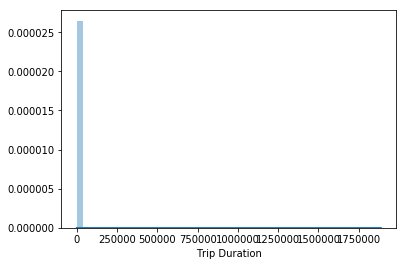

In [21]:
minimum_trip_duration = dockless_data['Trip Duration'].min() # minimum trip distance
maximum_trip_duration = dockless_data['Trip Duration'].max()

bins = np.arange(minimum_trip_duration, maximum_trip_duration, 50)
sns.distplot(dockless_data['Trip Duration'])

In [121]:
df.groupby(['Trip Duration', 'Origin Cell ID']).agg('count')

Trip Distance  Start Time  End Time  Month  \
Trip Duration Origin Cell ID                                               
-431.0        014715                      1           1         1      1   
 0.0          13124                       1           1         1      1   
              14076                       2           2         2      2   
              14225                       1           1         1      1   
              14226                       1           1         1      1   
              14230                       1           1         1      1   
              14235                       1           1         1      1   
              14385                       4           4         4      4   
              14386                       1           1         1      1   
              14391                       1           1         1      1   
              14393                       1           1         1      1   
              14563                       1           1         1      1   
              14706                       3           3         3      3   
              14709                       1           1         1      1   
              14710                       2           2         2      2   
              14713                       1           1         1      1   
              14714                       1           1         1      1   
              14716                       1           1         1      1   
              14864                       2           2         2      2   
              14865                       1           1         1      1   
              14867                       2           2         2      2   
              15019                       1           1         1      1   
              15020                       1           1         1      1   
              15021                       1           1         1      1   
              15029                       1           1         1      1   
              15180                       1           1         1      1   
              15182                       1           1         1      1   
              15341                       1           1         1      1   
              15346                       1           1         1      1   
              15509                       1           1         1      1   
...                                     ...         ...       ...    ...   
 190239.0     017237                      1           1         1      1   
 191538.0     014549                      1           1         1      1   
 191628.0     013289                      1           1         1      1   
 193011.0     015018                      1           1         1      1   
 195663.0     014393                      1           1         1      1   
 198974.0     015179                      1           1         1      1   
 218003.0     013441                      1           1         1      1   
 222937.0     013116                      1           1         1      1   
 239627.0     014863                      1           1         1      1   
 240884.0     016117                      1           1         1      1   
 242829.0     016117                      1           1         1      1   
 268637.0     016117                      1           1         1      1   
 269128.0     14702                       1           1         1      1   
 270436.0     11046                       1           1         1      1   
 271307.0     14392                       1           1         1      1   
 337876.0     016117                      1           1         1      1   
 351637.0     015693                      1           1         1      1   
 419255.0     014236                      1           1         1      1   
 428844.0     014393                      1           1         1      1   
 534748.0     016752                      1           1         1      1   
 5

In [140]:
trip_distance_value_count = df['Trip Distance'].value_counts()
trip_distance_value_count.sort_values()
# trip_distance_value_count = df_raw['Trip_distance'].value_counts() # trip distance value count
# trip_distance_value_count.head()

 1.461800e+04         1
 2.395000e+04         1
-2.394400e+04         1
 2.390600e+04         1
 2.390000e+04         1
 2.389400e+04         1
 2.386000e+04         1
 2.382300e+04         1
 3.146600e+04         1
 2.401730e+05         1
 2.382200e+04         1
 2.397900e+04         1
 2.404240e+05         1
 1.715635e+06         1
 2.379100e+04         1
-2.220000e+04         1
 2.375600e+04         1
-2.374900e+04         1
 2.369200e+04         1
-1.973850e+05         1
 2.560900e+04         1
-2.562000e+04         1
-1.750000e+02         1
 2.381600e+04         1
 3.136900e+04         1
 1.572886e+09         1
-1.160000e+02         1
 2.354300e+04         1
 2.351700e+04         1
 2.350200e+04         1
                  ...  
 7.000000e+00      2436
 2.100000e+03      2438
 1.600000e+01      2477
 6.000000e+00      2541
 2.000000e+03      2669
 5.000000e+00      2679
 4.000000e+00      2873
 1.900000e+03      2933
 3.000000e+00      3225
 1.800000e+03      3301
 1.700000e+03   

In [129]:
len(trip_distance_value_count)

15441

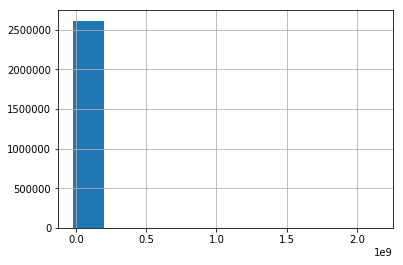

In [131]:
df['Trip Distance'].hist()

In [132]:
df[df['Trip Distance'] == 700.0]

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE
829,162.0,700.0,2018-11-09 08:00:00,2018-11-09 08:00:00,11,8,5,9,9,015029,015030,2018,30.284,-97.739,30.286,-97.738,2018-11-09,2018-11-09
964,327.0,700.0,2018-09-04 13:45:00,2018-09-04 13:45:00,9,13,2,9,9,015188,015188,2018,30.287,-97.737,30.287,-97.736,2018-09-04,2018-09-04
1250,256.0,700.0,2018-11-11 13:00:00,2018-11-11 13:00:00,11,13,0,9,9,015186,014715,2018,30.283,-97.737,30.286,-97.743,2018-11-11,2018-11-11
1273,201.0,700.0,2018-11-07 20:15:00,2018-11-07 20:15:00,11,20,3,9,9,014717,014402,2018,30.291,-97.744,30.290,-97.747,2018-11-07,2018-11-07
1953,528.0,700.0,2018-10-04 18:00:00,2018-10-04 18:15:00,10,18,4,9,9,014391,014706,2018,30.266,-97.748,30.265,-97.745,2018-10-04,2018-10-04
1965,354.0,700.0,2018-10-10 08:45:00,2018-10-10 09:00:00,10,8,3,9,9,015031,014873,2018,30.288,-97.740,30.287,-97.740,2018-10-10,2018-10-10
2142,335.0,700.0,2018-11-15 17:45:00,2018-11-15 18:00:00,11,17,4,9,9,014865,014707,2018,30.269,-97.742,30.268,-97.743,2018-11-15,2018-11-15
2431,481.0,700.0,2018-10-13 12:00:00,2018-10-13 12:15:00,10,12,6,5,5,012966,012965,2018,30.247,-97.769,30.245,-97.771,2018-10-13,2018-10-13
2659,301.0,700.0,2018-12-01 18:15:00,2018-12-01 18:15:00,12,18,6,9,9,014707,014706,2018,30.267,-97.743,30.265,-97.743,2018-12-01,2018-12-01
3116,866.0,700.0,2018-09-22 18:30:00,2018-09-22 18:30:00,9,18,6,9,9,014706,014864,2018,30.266,-97.743,30.266,-97.740,2018-09-22,2018-09-22


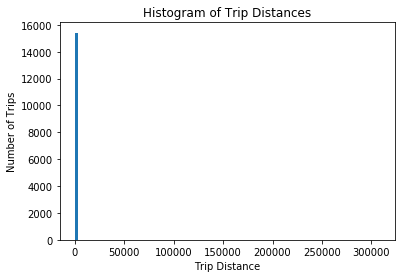

In [137]:
# bin_edges = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30] -- not required to bin the data here
_ = plt.hist(trip_distance_value_count, bins=100)
_ = plt.title('Histogram of Trip Distances')
_ = plt.xlabel('Trip Distance')
_ = plt.ylabel('Number of Trips')
plt.show()

In [138]:
df[df['Trip Distance'] == 0.0]

,Trip Duration,Trip Distance,Start Time,End Time,Month,Hour,Day of Week,Council District (Start),Council District (End),Origin Cell ID,Destination Cell ID,Year,Start Latitude,Start Longitude,End Latitude,End Longitude,START_DATE,END_DATE
3,1096.0,0.0,2018-09-02 16:45:00,2018-09-02 17:00:00,9,16,0,9,9,014707,014081,2018,30.268,-97.743,30.276,-97.752,2018-09-02,2018-09-02
16,81.0,0.0,2018-11-29 11:15:00,2018-11-29 11:15:00,11,11,4,9,9,014871,015029,2018,30.283,-97.740,30.283,-97.738,2018-11-29,2018-11-29
19,1008.0,0.0,2018-10-17 17:30:00,2018-10-17 17:45:00,10,17,3,9,9,014385,014385,2018,30.251,-97.748,30.252,-97.748,2018-10-17,2018-10-17
50,977.0,0.0,2018-10-02 20:00:00,2018-10-02 20:15:00,10,20,2,9,9,015187,014714,2018,30.285,-97.735,30.284,-97.744,2018-10-02,2018-10-02
64,324.0,0.0,2018-10-23 12:30:00,2018-10-23 12:30:00,10,12,2,9,9,014557,014715,2018,30.285,-97.744,30.286,-97.744,2018-10-23,2018-10-23
70,124.0,0.0,2018-10-07 13:15:00,2018-10-07 13:15:00,10,13,0,9,9,015019,015018,2018,30.261,-97.738,30.259,-97.738,2018-10-07,2018-10-07
81,290.0,0.0,2018-09-22 20:45:00,2018-09-22 20:45:00,9,20,6,9,9,014863,014863,2018,30.265,-97.740,30.265,-97.741,2018-09-22,2018-09-22
83,244.0,0.0,2018-10-12 17:15:00,2018-10-12 17:15:00,10,17,5,9,9,014715,014715,2018,30.286,-97.744,30.286,-97.744,2018-10-12,2018-10-12
84,492.0,0.0,2018-09-01 13:45:00,2018-09-01 13:45:00,9,13,6,9,9,014873,015343,2018,30.287,-97.741,30.283,-97.734,2018-09-01,2018-09-01
90,400.0,0.0,2018-08-25 19:30:00,2018-08-25 19:45:00,8,19,6,9,9,014863,014393,2018,30.264,-97.741,30.270,-97.749,2018-08-25,2018-08-25


#### Note that our official trip reporting metrics only include trips which meet the following criteria: 
    ** trip distance greater than or equal to .1 miles and less than 500 miles
    ** trip duration less than 24 hours

In [ ]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
trip_distance_count  = dockless_data['Trip Distance'].value_counts()

#trip_distance_count = trip_distance_count[:20,]
plt.figure(figsize=(20,5))
sns.barplot(trip_distance_count.index, trip_distance_count.values, alpha=0.8)
plt.title('Trips Distances Value Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Distances in Meters', fontsize=12,rotation='horizontal')
# ax.tick_params(axis='x', rotation=45)
# plt.xticks(range(10), indices)
# plt.xlim([-1, 10])
plt.xticks(rotation=45)
plt.savefig('Trip_Distance_Value_Counts.png')
plt.show()

KeyboardInterrupt: 

In [171]:
trip_distance_count.shape
                        

(20,)

In [ ]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
trip_distance_count  = df['Trip Distance'].value_counts()

trip_distance_count = trip_distance_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(trip_distance_count.index, trip_distance_count.values, alpha=0.8)
plt.title('Trips Distances in Meters')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Distances in Meters', fontsize=12,rotation='horizontal')
# ax.tick_params(axis='x', rotation=45)
# plt.xticks(range(10), indices)
# plt.xlim([-1, 10])
plt.xticks(rotation=45)
plt.savefig('13_Feature_ranking.png')
plt.show()